In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
# 1) Load the entire JSON
with open('../optimizations/BettiZeroSegmentations3.json') as f:
    data = json.load(f)

### Building The Vector

In the preprint by Haruhisa Oda, he uses $N\times K\times m$ vectors, where $m$ is the number of longest bars, and $N$ is the number of projections, $K$ is the number of directions. Since I am using $3D$ persistence, I will use the same $m$ as in his papers $m=5$, but will not be doing $N\times K$.

In [6]:
seg_vectors = {}
# 2) Loop over each segmentation block...
for seg_name, seg_samples in data.items():
    print(seg_name)
    if "-AI-" in seg_name:
        pca_vector = []
        for val in seg_samples.values():
            for bar in val['largest_bars']:
                pca_vector.append(bar[1]-bar[0])      
        seg_vectors[seg_name] = pca_vector

Lung segmentation-AI-19
Lung segmentation-AI-2
Lung segmentation-25
Lung segmentation-20
Lung segmentation-AI-32
Lung segmentation-52
Lung segmentation-48
Lung segmentation-AI-10
Lung segmentation-AI-25
Lung segmentation-AI-17
Lung segmentation-AI-15
Lung segmentation-AI-9
Lung segmentation-AI-20
Lung segmentation-36
Lung segmentation-17
Lung segmentation-2
Lung segmentation-34
Lung segmentation-AI-34
Lung segmentation-AI-29
Lung segmentation-19
Lung segmentation-65
Lung segmentation-AI-48
Lung segmentation-56
Lung segmentation-32
Lung segmentation-39
Lung segmentation-4
Lung segmentation-57
Lung segmentation-9
Lung segmentation-AI-39
Lung segmentation-10
Lung segmentation-15
Lung segmentation-AI-36
Lung segmentation-AI-4


### Conducting PCA

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Explained variance ratios: [0.61339919 0.08961144]


,PC1,PC2
19,18.827596,4.562691
2,26.601573,-7.378427
32,-23.855157,-4.559802
10,1.584123,-3.814061
25,-6.419711,-5.510482


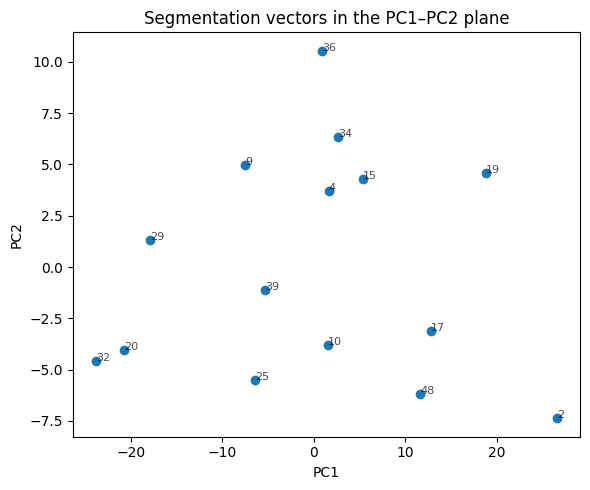

In [5]:
# -------------------------------------------------
# 1)  Pack the dict into a (n_samples, n_features) matrix
# -------------------------------------------------
names   = list(seg_vectors.keys())              # preserve order
X_array = np.vstack([seg_vectors[n] for n in names])

# -------------------------------------------------
# 2)  (Recommended) z-score the features
# -------------------------------------------------
scaler = StandardScaler()
X_std = scaler.fit_transform(X_array)

# -------------------------------------------------
# 3)  Fit PCA and get the scores
# -------------------------------------------------
pca = PCA(n_components=2, svd_solver='auto', random_state=0)
PC_scores = pca.fit_transform(X_std)         # shape: (n_samples, 2)

# Pack into a neat DataFrame
numbers = [int(s.split('-')[-1]) for s in names]
pca_scores = pd.DataFrame(PC_scores, columns=['PC1', 'PC2'], index=numbers)

# -------------------------------------------------
# 4)  Inspect results
# -------------------------------------------------
print('Explained variance ratios:', pca.explained_variance_ratio_)
display(pca_scores.head())

# Optional visualisation
plt.figure(figsize=(6, 5))
plt.scatter(pca_scores['PC1'], pca_scores['PC2'])
for txt, (x, y) in pca_scores.iterrows():
    plt.annotate(txt, (x, y), fontsize=8, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segmentation vectors in the PC1–PC2 plane')
plt.tight_layout()
plt.show()